# Regression Tutorial with Python  
## Use Case: Predicting California House Prices  
This notebook teaches regression using ONE clean working example.  
At the end, you will learn how to upload your own CSV and reuse the same code.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

plt.style.use("default")
sns.set()

print("Imports loaded.")


Imports loaded.


# 1. Dataset Overview (California Housing)
We will use the built-in **California Housing** dataset.

Why?

- No missing values  
- No need to upload files  
- Real-world regression problem  
- Perfect for a clean, working notebook  

Goal: **Predict Median House Value** using 8 input features.


In [2]:
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseVal"] = data.target

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 2. Define X (features) and y (target)

In this tutorial:
- **Target:** `MedHouseVal`
- **Features:** All other columns

This dataset is 100% ready — no cleaning needed.


In [3]:
target_col = "MedHouseVal"
feature_cols = list(df.columns)
feature_cols.remove("MedHouseVal")

X = df[feature_cols]
y = df[target_col]

X.shape, y.shape


((20640, 8), (20640,))

# 3. Split Data into Train and Test Sets
We use:
- 80% → training
- 20% → testing


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 4. Scale Features (for Linear Regression)
Random Forest does NOT need scaling.


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. Linear Regression (Baseline Model)


In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)**0.5
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, rmse_lr, r2_lr


(0.5332001304956565, 0.7455813830127763, 0.575787706032451)

# 6. Random Forest Regressor (Non-linear Powerful Model)


In [9]:
rf = RandomForestRegressor(
    n_estimators=300,
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)**0.5
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(0.32660672448320444, 0.5034218492503685, 0.8065996475063294)

# 7. Compare Model Performance


In [10]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2": [r2_lr, r2_rf]
})

results


,Model,MAE,RMSE,R2
0,Linear Regression,0.533200,0.745581,0.575788
1,Random Forest,0.326607,0.503422,0.806600


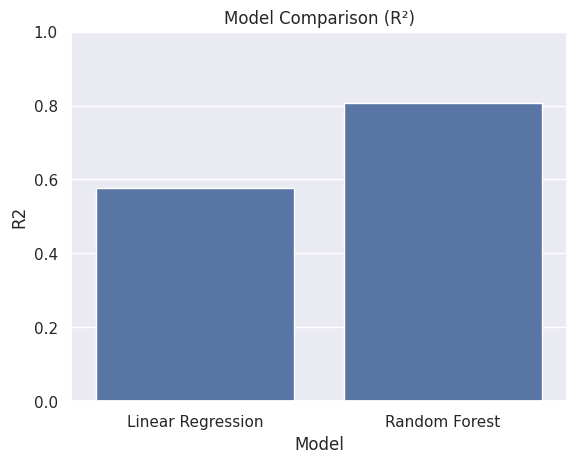

In [11]:
sns.barplot(data=results, x="Model", y="R2")
plt.title("Model Comparison (R²)")
plt.ylim(0, 1)
plt.show()


# 8. Feature Importance (Random Forest)


In [12]:
importance_df = pd.DataFrame({
    "feature": feature_cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

importance_df



,feature,importance
0,MedInc,0.525736
5,AveOccup,0.138081
7,Longitude,0.088547
6,Latitude,0.088531
1,HouseAge,0.054213
2,AveRooms,0.044668
4,Population,0.030557
3,AveBedrms,0.029668


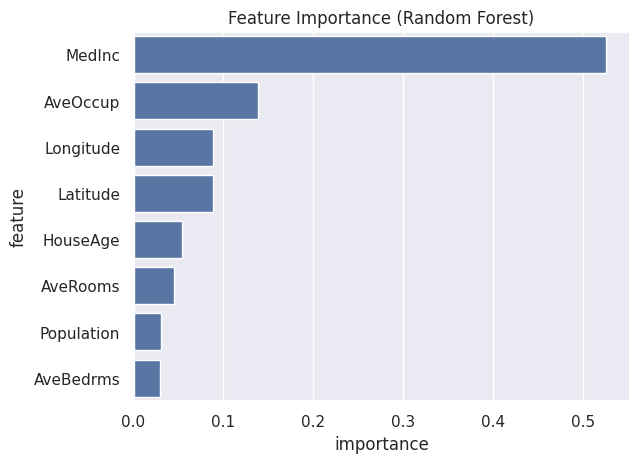

In [13]:
sns.barplot(data=importance_df, y="feature", x="importance")
plt.title("Feature Importance (Random Forest)")
plt.show()


# 9. Save the Best Model


In [14]:
joblib.dump(rf, "best_model.joblib")


['best_model.joblib']

# 10. Predict on New Data
Example: Predict house value for a user-defined input.


In [15]:
example = X_test.iloc[:5]
rf.predict(example)


array([0.49249333, 0.73544   , 4.87372677, 2.52624   , 2.30335   ])

# 📌 HOW TO USE THIS TEMPLATE WITH YOUR OWN CSV

Replace ONLY these two cells:

---

## Step 1 — Load your CSV

```python
import pandas as pd
df = pd.read_csv("your_file.csv")


In [17]:
target_col = "your_target"
feature_cols = ["colA", "colB", "colC"]




# **Beginner’s Tutorial: Understanding Regression + Python Syntax**

This section is designed for absolute beginners who want to learn:

* *What regression is*
* *Why we use it*
* *What each piece of Python code does*
* *How to reuse this notebook for any regression problem*

If you’ve never done machine learning before, this tutorial is for you.

---

# 1. What Is Regression?

**Regression** is one of the simplest and most useful techniques in machine learning.

It answers one core question:

> **“Given some information (features), can we predict a number (target)?"**

Examples:

| Use Case                   | Features (X)                  | Target (y)   |
| -------------------------- | ----------------------------- | ------------ |
| Predict house prices       | rooms, location, size         | price        |
| Predict sales              | ad spend, month, product type | revenue      |
| Predict exam score         | hours studied, previous marks | score        |
| Predict electricity demand | temperature, time of day      | energy usage |

If the value you want to predict is a **number**, that is regression.

---

# 2. What Does Regression Learn?

Regression tries to learn the relationship between:

* **Inputs** = features (X)
* **Output** = target (y)

In its simplest form:

```
y = f(X)
```

Meaning:

> Build a mathematical function that can estimate “y” based on “X”.

Two models we train in this notebook:

* **Linear Regression**
  Learns straight-line relationships
* **Random Forest Regression**
  Learns non-linear, complex patterns

---

# 3. How a Regression Project Works (Step-by-Step)

Every regression project in Python follows the same 8 steps:

### ✔ Step 1 — Import libraries

### ✔ Step 2 — Load your dataset

### ✔ Step 3 — Choose target and feature columns

### ✔ Step 4 — Split into training & testing data

### ✔ Step 5 — Scale features (for linear models)

### ✔ Step 6 — Train models

### ✔ Step 7 — Evaluate models

### ✔ Step 8 — Predict on new data

Once you understand this flow, you can do *any* regression problem.

---

# 4. Python Syntax Explained (Line-by-Line)

Below is a beginner’s explanation of the actual Python code used in the notebook.

---

## **4.1 Importing libraries**

```python
import numpy as np
import pandas as pd
```

* `numpy` → handles numbers
* `pandas` → handles datasets (tables)

```python
import matplotlib.pyplot as plt
import seaborn as sns
```

* `matplotlib` + `seaborn` → create charts and visuals

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
```

* `scikit-learn (sklearn)` is the most popular ML library
* Provides ready-made ML models

---

## **4.2 Loading the dataset**

```python
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseVal"] = data.target
```

* Converts raw data into a **DataFrame** (table)
* Adds the target column (`MedHouseVal`)

---

## **4.3 Defining X and y**

```python
target_col = "MedHouseVal"
feature_cols = list(df.columns)
feature_cols.remove("MedHouseVal")
```

* `target_col` = the value we want to predict
* `feature_cols` = all the inputs used to make the prediction

```python
X = df[feature_cols]
y = df[target_col]
```

* `X` contains many input columns
* `y` contains ONE column — the target

This pattern **never changes**.

---

## **4.4 Train-Test Split**

```python
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
```

This splits data into:

* **Training set (80%)** → used to learn patterns
* **Test set (20%)** → used to evaluate accuracy on unseen data

`random_state=42` just makes sure results are repeatable.

---

## 📏 **4.5 Scaling (Standardizing) Data**

```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

Why scaling?

* Linear Regression works best when all features have similar ranges
* Prevents some columns from dominating the model

Random Forest does NOT require scaling, but it doesn’t harm anything.

---

## **4.6 Train Linear Regression**

```python
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
```

* Creates a linear model
* `.fit()` means **learn the relationships** from training data

```python
y_pred_lr = lin_reg.predict(X_test_scaled)
```

* `.predict()` uses what the model learned to estimate house prices for unseen data

---

## **4.7 Train Random Forest**

```python
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
```

* A Random Forest is a collection of **hundreds of decision trees**
* It learns **non-linear**, more flexible patterns than linear regression

---

## **4.8 Evaluation Metrics**

```python
mae = mean_absolute_error(y_test, predictions)
```

Lower MAE = better.
“How many units are we OFF on average?”

```python
rmse = mean_squared_error(y_test, predictions) ** 0.5
```

RMSE penalizes big errors more.

```python
r2 = r2_score(y_test, predictions)
```

Higher R² = better.
Measures how much variance in y is explained by X.

---

## **4.9 Feature Importance (Random Forest)**

```python
rf.feature_importances_
```

Shows which features the model relied on most.

Example:

* “Median Income” might be most important
* “Longitude” might be least important

---

## **4.10 Saving the Model**

```python
joblib.dump(rf, "best_model.joblib")
```

Saves the trained model to file so you can use it later.

---

## 4.11 Predicting on New Data

```python
example = X_test.iloc[:5]
rf.predict(example)
```

Shows how the model predicts new unseen rows.

---

# 5. How to Use This Template With Your Own CSV

If you want to use YOUR data instead of the California dataset:

### ✔ Step 1 — Load your CSV

```python
df = pd.read_csv("your_file.csv")
```

### ✔ Step 2 — Pick your target column

```python
target_col = "price"
```

### ✔ Step 3 — Pick your feature columns

```python
feature_cols = ["rooms", "sqft", "zipcode"]
```

### ✔ Step 4 — Build X and y

```python
X = df[feature_cols]
y = df[target_col]
```

### ✔ Step 5 — Run the rest of the notebook EXACTLY as-is

* train/test split
* scaling
* linear regression
* random forest
* evaluation
* feature importance

You don’t need to change anything else.

---

# Final Notes

Congratulations — if you understand this tutorial, you understand:

* what regression is
* how regression works in Python
* how to train two powerful models
* how to evaluate model performance
* how to reuse this exact notebook on ANY dataset


